## Telecom Churn Case Study

**Problem Statement**

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## Step 1 : Importing Library and Data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Suppressing warnings
import warnings 
warnings.filterwarnings(action = 'ignore')

In [2]:
pd.set_option('display.max_column',500)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_colwidth', -1)

In [3]:
# Read the dataset
churn = pd.read_csv(r'C:\Users\Admin\Desktop\Data Science\Machine Learning\Telecom Churn\telecom_churn_data.csv')

In [137]:
# Read the Data Dictionary for dataset
data_dict = pd.read_excel(r'C:\Users\Admin\Downloads\Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')
data_dict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belongs to
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mobile to mobile)"
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


## Step 2 : Understanding the data

In [5]:
# checking headings of the dataset
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
# checking size of the dataset
churn.size

22599774

In [7]:
# checking shape of the dataset
churn.shape

(99999, 226)

In [8]:
# checking info of the dataset
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [9]:
# describe of the dataset
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [10]:
# checking null values of the dataset
churn.isnull().sum()

mobile_number               0    
circle_id                   0    
loc_og_t2o_mou              1018 
std_og_t2o_mou              1018 
loc_ic_t2o_mou              1018 
last_date_of_month_6        0    
last_date_of_month_7        601  
last_date_of_month_8        1100 
last_date_of_month_9        1659 
arpu_6                      0    
arpu_7                      0    
arpu_8                      0    
arpu_9                      0    
onnet_mou_6                 3937 
onnet_mou_7                 3859 
onnet_mou_8                 5378 
onnet_mou_9                 7745 
offnet_mou_6                3937 
offnet_mou_7                3859 
offnet_mou_8                5378 
offnet_mou_9                7745 
roam_ic_mou_6               3937 
roam_ic_mou_7               3859 
roam_ic_mou_8               5378 
roam_ic_mou_9               7745 
roam_og_mou_6               3937 
roam_og_mou_7               3859 
roam_og_mou_8               5378 
roam_og_mou_9               7745 
loc_og_t2t_mou

In [11]:
# Checking percentage of the missing values
(round((churn.isnull().mean()*100),2).to_frame('null')).sort_values('null',ascending = False)

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
fb_user_6,74.85
av_rech_amt_data_6,74.85
date_of_last_rech_data_6,74.85
count_rech_2g_6,74.85
count_rech_3g_6,74.85


## Step 3 : Data Cleaning

In [12]:
# Droping null values having more than 35% of missing values
null = round((churn.isnull().mean()*100),2) 
null_values = null[null > 35 ].index.tolist()
print(null_values)

['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


In [13]:
len(null_values)

40

In [14]:
# Droping null values 
churn = churn.drop(null_values,axis = 1)

In [15]:
# Drop date column as they not required for the analysis
date_col = [i for i in churn if 'date' in i]
date_col


['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [16]:
# Drop date columns
churn = churn.drop(date_col,axis = 1)

### Derive New Features

In [17]:
# Deriving new column 'decr_mou_action'

# This column indicates the Minutes of usage(voice calls) of customer has decrease in the action phase than the good phase

# Total mou of the incoming and outgoing calls at good phase
churn['total_mou_good'] = (churn['total_ic_mou_6'] + churn['total_og_mou_6'])

In [18]:
# avg_mou for the month(7 and 8) in the action phase
churn['avg_mou_action'] = (churn['total_ic_mou_7'] + churn['total_ic_mou_8'] + churn['total_og_mou_7'] + churn['total_og_mou_8'])/2

In [19]:
# taking a difference between total_mou_good and avg_mou_action
churn['diff_mou'] = (churn['avg_mou_action'] - churn['total_mou_good'])

In [20]:
# checking mou_action has been decreased or not in action phase
churn['decr_mou_action'] = np.where((churn['diff_mou'] < 0), 1, 0)
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_mou_good,avg_mou_action,diff_mou,decr_mou_action
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,0.00,2.720,2.720,0
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.

In [21]:
# Deriving new column 'decr_rech_num_action'

# This column indicates the number of recharge of customer has decrease in the action phase than the good phase

# TAvg rech number at action phase
churn['avg_rech_num_action'] = (churn['total_rech_num_7'] + churn['total_rech_num_8'])/2

In [22]:
# Diff between total rech num 6 and avg rech action
churn['diff_rech_num'] = churn['avg_rech_num_action'] - churn['total_rech_num_6']

In [23]:
# checking if rech num has decreased in action phase

churn['decr_rech_num_action'] = np.where((churn['diff_rech_num'] < 0 ), 1, 0)
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_mou_good,avg_mou_action,diff_mou,decr_mou_action,avg_rech_num_action,diff_rech_num,decr_rech_num_action
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,0.00,2.720,2.720,0,2.5,-1.5,1
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35

In [24]:
# Deriving new column 'decr_rech_amt_action'

# This column indicates the amount of recharge of customer has decrease in the action phase than the good phase

#avg rech number at action phase
churn['avg_rech_amt_action'] = (churn['total_rech_amt_7'] + churn['total_rech_amt_8'])/2

In [25]:
# diff of total_rech_num_6 and avg_rech_action
churn['diff_rech_amt'] = churn['avg_rech_amt_action'] - churn['total_rech_amt_6']

In [26]:
# check if rech_num has decreased in action phase
churn['decr_rech_amt_action'] = np.where((churn['diff_rech_amt'] < 0),1, 0)
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_mou_good,avg_mou_action,diff_mou,decr_mou_action,avg_rech_num_action,diff_rech_num,decr_rech_num_action,avg_rech_amt_action,diff_rech_amt,decr_rech_amt_action
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,0.00,2.720,2.720,0,2.5,-1.5,1,252.0,-110.0,1
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.

In [27]:
# Deriving new column 'decr_arpu_action'

# This column indicates the average revenue per customer has decrease in the action phase than the good phase

# arpu in action phase
churn['avg_arpu_action'] = (churn['arpu_7'] + churn['arpu_8'])/2

In [28]:
#diff of good and action phase ARPU
churn['diff_arpu'] = churn['avg_arpu_action'] - churn['arpu_6']

In [29]:
# check the arpu has decreased in action phase
churn['decr_arpu_action'] = np.where((churn['diff_arpu'] < 0 ),1, 0)
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_mou_good,avg_mou_action,diff_mou,decr_mou_action,avg_rech_num_action,diff_rech_num,decr_rech_num_action,avg_rech_amt_action,diff_rech_amt,decr_rech_amt_action,avg_arpu_action,diff_arpu,decr_arpu_action
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,0.00,2.720,2.720,0,2.5,-1.5,1,252.0,-110.0,1,214.3095,16.9245,0
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.3

In [30]:
# Deriving new column 'decr_vbc_action'

# This column indicates the volume based cost of customer has decrease in the action phase than the good phase

# VBc in action phase
churn['avg_vbc_3g_action'] = (churn['jul_vbc_3g'] + churn['aug_vbc_3g'])/2

In [31]:
# diff of good and action phase VBC
churn['diff_vbc'] = churn['avg_vbc_3g_action'] - churn['jun_vbc_3g']

In [32]:
# check the vbc has decreased in action month
churn['decr_vbc_action'] = np.where((churn['diff_vbc'] < 0 ), 1, 0)
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_mou_good,avg_mou_action,diff_mou,decr_mou_action,avg_rech_num_action,diff_rech_num,decr_rech_num_action,avg_rech_amt_action,diff_rech_amt,decr_rech_amt_action,avg_arpu_action,diff_arpu,decr_arpu_action,avg_vbc_3g_action,diff_vbc,decr_vbc_action
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,0.00,2.720,2.720,0,2.5,-1.5,1,252.0,-110.0,1,214.3095,16.9245,0,15.2,-86.00,1
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.

### Filter High Value Customers

In [33]:
#Creating new column avg_rech_amt_6_7 by calculating sum of 6 and 7 month and taking avg
churn['avg_rech_amt_6_7'] = (churn['total_rech_amt_6'] + churn['total_rech_amt_7']/2)

In [34]:
# taking 70 percentile of the 6 and 7 month
X = churn['avg_rech_amt_6_7'].quantile(0.7)
X

554.0

In [35]:
# customers who has reacharge of >= X
churn = churn[churn['avg_rech_amt_6_7'] >= X]
churn.head(3)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_mou_good,avg_mou_action,diff_mou,decr_mou_action,avg_rech_num_action,diff_rech_num,decr_rech_num_action,avg_rech_amt_action,diff_rech_amt,decr_rech_amt_action,avg_arpu_action,diff_arpu,decr_arpu_action,avg_vbc_3g_action,diff_vbc,decr_vbc_action,avg_rech_amt_6_7
6,7001051193,109,0.0,0.0,0.0,429.023,190.704,255.114,114.751,71.03,45.03,76.66,15.23,262.73,49.24,92.08,50.33,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,71.03,45.03,76.14,15.23,252.23,48.71,80.63,50.33,10.38,0.00,0.00,0.0,0.11,0.0,0.00,0.0,333.64,93.74,156.78,65.56,0.00,0.00,0.51,0.00,0.00,0.53,11.45,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.53,11.96,0.00,0.0,0.00,0.00,0.0,0.11,0.53,0.00,0.0,0.0,0.0,0.0,0.35,333.76,94.81,168.74,65.91,1857.99,1427.04,1896.43,2334.88,248.64,336.96,265.28,231.41,20.24,22.69,2.51,6.19,2126.89,1786.71,2164.23,2572.49,0.00,0.00,0.00,0.0,1.39,0.76,2.60,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.39,0.76,2.60,0.00,2128.41,1788.06,2167.11,2572.49,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.11,0.58,0.28,0.0,15,10,11,7,499,222,294,141,90,37,50,30,37,24,10,24,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1673,0.00,0.00,0.00,0.0,2462.17,2109.360,-352.810,1,10.5,-4.5,1,258.0,-241.0,1,222.9090,-206.1140,1,0.00,0.00,0,610.0
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,4

In [36]:
churn.shape

(30007, 195)

- After filtering high value customers we have about 30k rows

#### Handling missing values in rows

In [37]:
# calculating rows having more than 50% of missing values
df_missingrows = churn[(churn.isnull().sum(axis=1)) > (len(churn.columns)//2)]
df_missingrows.shape

(126, 195)

In [38]:
# Droping these missing rows
churn = churn.drop(df_missingrows.index)
churn.shape

(29881, 195)

In [39]:
# Again Checking percentage of the missing values
null_values = (round((churn.isnull().mean()*100),2).to_frame('null')).sort_values('null',ascending = False)
null_values

,null
spl_og_mou_9,5.85
std_ic_t2f_mou_9,5.85
loc_og_mou_9,5.85
isd_og_mou_9,5.85
roam_og_mou_9,5.85
std_og_mou_9,5.85
loc_og_t2t_mou_9,5.85
std_ic_mou_9,5.85
std_og_t2c_mou_9,5.85
std_ic_t2m_mou_9,5.85


- Mou of all types of calls having missing values for the month of september(9)

In [40]:
# Droping the columns of Mou for month of september(9) 
null_mou_9 = ((null_values[null_values['null'] == 5.85]).index).tolist()
churn = churn.drop(null_mou_9 , axis= 1)

In [41]:
churn.shape

(29881, 166)

In [42]:
# Again Checking percentage of the missing values
null_values = (round((churn.isnull().mean()*100),2).to_frame('null')).sort_values('null',ascending = False)
null_values

,null
isd_og_mou_8,3.40
std_ic_t2t_mou_8,3.40
loc_ic_mou_8,3.40
loc_og_t2t_mou_8,3.40
loc_ic_t2f_mou_8,3.40
loc_og_t2m_mou_8,3.40
loc_ic_t2m_mou_8,3.40
loc_og_t2f_mou_8,3.40
loc_ic_t2t_mou_8,3.40
loc_og_t2c_mou_8,3.40


- Mou of all types of calls having missing values for the month of August(8)

In [43]:
# Droping the columns of Mou for month of August(8) 
null_mou_8 = ((null_values[null_values['null'] == 3.40]).index).tolist()
churn = churn.drop(null_mou_8 , axis= 1)
churn.shape

(29881, 137)

In [44]:
# Again Checking percentage of the missing values
null_values = (round((churn.isnull().mean()*100),2).to_frame('null')).sort_values('null',ascending = False)
null_values

,null
loc_ic_t2t_mou_7,0.96
loc_og_t2f_mou_7,0.96
loc_og_mou_7,0.96
std_og_t2t_mou_7,0.96
std_og_t2m_mou_7,0.96
std_og_t2f_mou_7,0.96
std_og_t2c_mou_7,0.96
std_og_mou_7,0.96
spl_og_mou_7,0.96
og_others_7,0.96


- Mou for all types of call having missing values for the month of july(7)

In [45]:
# Droping the columns of Mou for month of july(7) 
null_mou_7 = ((null_values[null_values['null'] == 0.96]).index).tolist()
churn = churn.drop(null_mou_7 , axis= 1)
churn.shape

(29881, 108)

In [46]:
# Again Checking percentage of the missing values
null_values = (round((churn.isnull().mean()*100),2).to_frame('null')).sort_values('null',ascending = False)
null_values

,null
std_ic_t2t_mou_6,0.38
std_og_t2m_mou_6,0.38
std_og_t2c_mou_6,0.38
std_og_mou_6,0.38
isd_og_mou_6,0.38
og_others_6,0.38
loc_ic_t2t_mou_6,0.38
loc_ic_t2m_mou_6,0.38
loc_ic_t2f_mou_6,0.38
loc_ic_mou_6,0.38


- Mou for all types of call having missing values for the month of july(7)

In [47]:
# Droping the columns of Mou for month of June(6) 
null_mou_6 = ((null_values[null_values['null'] == 0.38]).index).tolist()
churn = churn.drop(null_mou_6 , axis= 1)

In [48]:
# Again Checking percentage of the missing values
null_values = (round((churn.isnull().mean()*100),2).to_frame('null')).sort_values('null',ascending = False)
null_values

,null
mobile_number,0.0
monthly_3g_7,0.0
aon,0.0
sachet_3g_9,0.0
sachet_3g_8,0.0
sachet_3g_7,0.0
sachet_3g_6,0.0
monthly_3g_9,0.0
monthly_3g_8,0.0
monthly_3g_6,0.0


- As we can see there is no more missing values in columns

#### Tag Churners

- Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [49]:
churn['churnn'] = np.where((churn['total_ic_mou_9'] == 0 ) & (churn['total_og_mou_9'] == 0) & (churn['vol_2g_mb_9'] == 0) & (churn['vol_3g_mb_9'] == 0),1,0)

In [50]:
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_mou_good,avg_mou_action,diff_mou,decr_mou_action,avg_rech_num_action,diff_rech_num,decr_rech_num_action,avg_rech_amt_action,diff_rech_amt,decr_rech_amt_action,avg_arpu_action,diff_arpu,decr_arpu_action,avg_vbc_3g_action,diff_vbc,decr_vbc_action,avg_rech_amt_6_7,churnn
6,7001051193,109,0.0,0.0,0.0,429.023,190.704,255.114,114.751,333.76,94.81,168.74,65.91,2128.41,1788.06,2167.11,2572.49,15,10,11,7,499,222,294,141,90,37,50,30,37,24,10,24,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1673,0.00,0.00,0.00,0.0,2462.17,2109.360,-352.810,1,10.5,-4.5,1,258.0,-241.0,1,222.9090,-206.1140,1,0.000,0.000,0,610.0,0
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,487.53,609.24,350.16,0.00,626.46,558.04,428.74,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1113.99,973.090,-140.900,1,6.0,1.0,0,2214.0,634.0,0,2260.6650,1191.4850,0,38.560,19.820,0,1975.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,508.36,431.66,171.56,142.18,103.86,28.49,16.54,34.91,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0,737.5,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,322.732,907.09,192.41,1015.26,446.09,968.61,172.58,1144.53,631.86,6,4,11,7,507,253,717,353,110,110,130,130,110,50,0,0,0.0,0.0,0.02,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0,633.5,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,206.490,346.81,286.01,233.38,255.74,364.86,381.56,294.46,334.56,10,6,2,1,570,348,160,220,110,110,130,220,100,100,130,220,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.0,711.67,597.705,-113.965,1,4.0,-6.0,1,254.0,-316.0,1,243.8815,-187.0935,1,1.225,-20.665,1,744.0,0


In [51]:
# droping all the attributes corresponding to the churn phase (all attributes having ‘ _9’)
col_to_drop_9 = [i for i in churn if '_9' in i]
churn = churn.drop(col_to_drop_9, axis = 1)

In [52]:
# droping  Circle_id column as it will not affect the analysis
churn = churn.drop('circle_id',axis = 1)

In [53]:
# Outlier Treatement

In [54]:
[col for col in churn if 'total' in col]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_mou_good']

## Step 4 : EDA

### Univariate Analysis

In [55]:
# churn rate in the basis of the customer decreased his/her MOU in action month

# converting churn column to int in order to do aggfun in pivot table
churn['churnn'] = churn['churnn'].astype('int64')

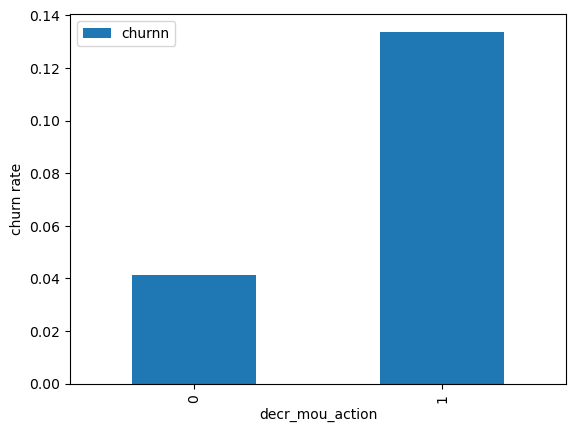

In [56]:
churn.pivot_table(values = 'churnn' , index = 'decr_mou_action', aggfunc = 'mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Inferences - 
- As we can see that the churn rate is more for the customers whose minutes if usage(MOU) decreased in the action phase than the good phase

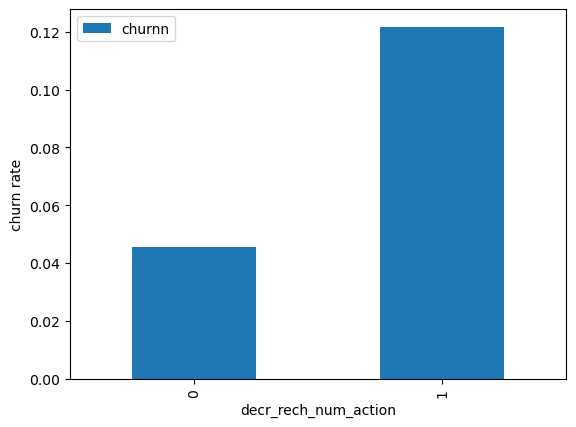

In [57]:
# churn rate on the basis of the customer decreased his/her number of recharge in action month
churn.pivot_table(values = 'churnn' , index = 'decr_rech_num_action', aggfunc = 'mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Inferences - 
- churn rate is more for the customers whose number of recharge in the action phase is lesser than the good phase

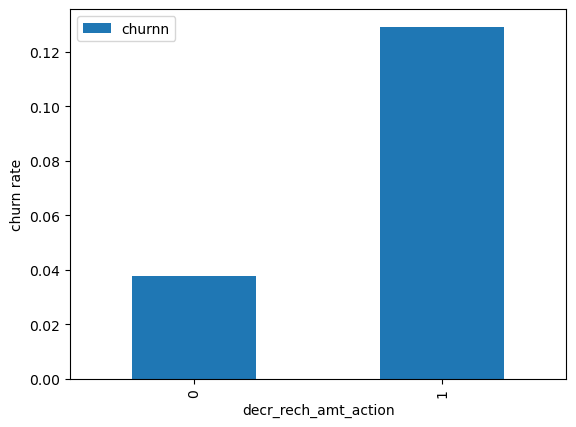

In [58]:
# churn rate on the basis of the customer decreased his/her amount of recharge in action month
churn.pivot_table(values = 'churnn' , index = 'decr_rech_amt_action', aggfunc = 'mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Inferences - 
- The churn rate is more for the customers whose amount of recharge is lesser in action phase than good phase

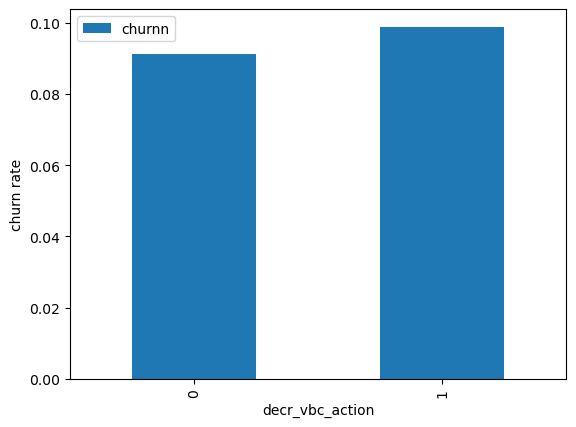

In [59]:
# churn rate on the basis of the customer decreased his/her volume based cost in action month
churn.pivot_table(values = 'churnn' , index = 'decr_vbc_action', aggfunc = 'mean').plot.bar()
plt.ylabel('churn rate')
plt.show()


Inferences - 
- The churn rate is more for the customers whose volume based cost in action month is increased.
- The customers do not recharge monthly when they are in action phase

In [60]:
# Average Revenue per customer(churn or not churn ) in action phase

churn_data = churn[churn['churnn']== 1]
not_churn_data = churn[churn['churnn'] == 0]

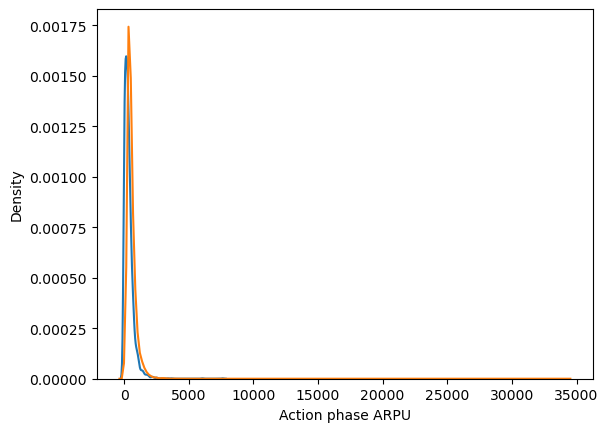

In [61]:
ax = sns.distplot(churn_data['avg_arpu_action'],label='churnn',hist=False)
ax = sns.distplot(not_churn_data['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

plt.show()

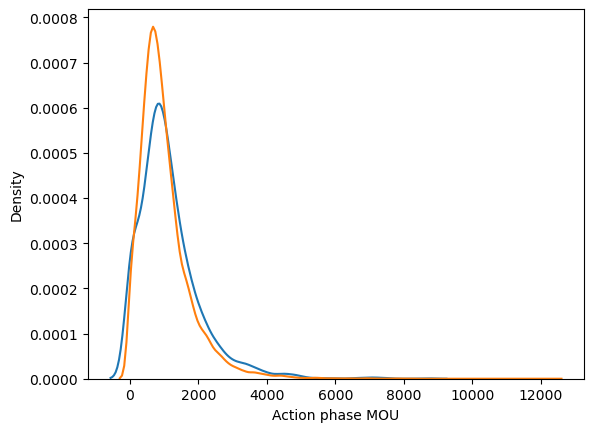

In [62]:
ax = sns.distplot(churn_data['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(not_churn_data['total_mou_good'],label='not churn',hist=False)
ax.set(xlabel='Action phase MOU')

plt.show()

<AxesSubplot:xlabel='avg_rech_num_action', ylabel='avg_rech_amt_action'>

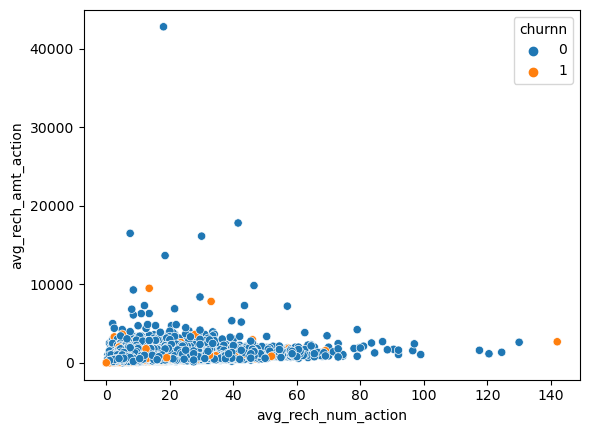

In [63]:
# analysis of the recharge amount and number of recharge in action month

sns.scatterplot('avg_rech_num_action','avg_rech_amt_action', hue='churnn', data=churn)

In [64]:
# drop unnecessary columns
churn = churn.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7','mobile_number'], axis=1)

## Train-Test Split

In [65]:
#import library
from sklearn.model_selection import train_test_split
X = churn.drop('churnn',axis = 1)
y = churn['churnn']

In [66]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Dealing with Data imbalance

In [67]:
#creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique)
#importing SMOTE

!pip install imblearn
from imblearn.over_sampling import SMOTE

In [68]:
sm = SMOTE(random_state= 27)
X_train, y_train = sm.fit_resample(X_train,y_train)

### Feature Scaling

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [70]:
# List of the numeric columns
num_col = X_train.columns.to_list()
# Removing the derived binary columns 
num_col.remove('decr_mou_action')
num_col.remove('decr_rech_num_action')
num_col.remove('decr_rech_amt_action')
num_col.remove('decr_arpu_action')
num_col.remove('decr_vbc_action')

In [71]:
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [72]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,decr_mou_action,decr_rech_num_action,decr_rech_amt_action,decr_arpu_action,decr_vbc_action
0,0.0,0.0,0.0,-0.214710,-0.050260,-0.756857,-0.424947,-0.442800,-0.680635,-0.560808,-0.543669,-0.490765,-0.451743,-0.430996,-0.903106,-0.199244,-0.092733,-0.753904,-0.319224,-0.158359,-0.719256,-0.250710,0.204097,-0.489599,-0.271857,-0.241407,-0.203814,-0.291526,-0.274396,-0.246879,-0.258406,-0.253519,-0.234190,-0.277416,-0.264176,-0.265916,-0.253092,-0.235715,-0.221915,-0.149944,-0.137465,-0.112754,-0.833387,-0.262086,-0.290534,-0.288548,-0.104903,1,1,1,1,0
1,0.0,0.0,0.0,-0.092419,-0.350596,-0.733897,-0.769187,-0.369240,-0.620818,-0.457993,-0.173606,-0.564807,-0.246704,-0.322038,-0.665155,-0.046036,-0.272494,-0.753904,-0.211500,-0.112232,-0.719256,0.073517,-0.640535,-0.489599,-0.271857,-0.241407,-0.203814,-0.291526,-0.274396,-0.246879,-0.258406,-0.253519,-0.234190,-0.277416,-0.264176,-0.265916,-0.253092,-0.235715,-0.221915,-0.149944,-0.137465,-0.112754,1.631506,-0.262086,-0.106639,-0.175387,-0.104903,1,1,1,1,1
2,0.0,0.0,0.0,-0.429510,-0.198775,-0.563300,0.018040,-0.289958,-0.358530,-0.298837,-0.533858,-0.486014,-0.861821,-0.539955,-0.308230,-0.451359,-0.181773,-0.460412,-0.319224,-0.216018,0.070492,0.073517,0.204097,-0.489599,-0.271857,-0.241407,-0.203814,-0.291526,-0.274396,-0.246879,-0.258406,-0.253519,-0.234190,-0.277416,-0.264176,-0.265916,-0.253092,-0.235715,-0.221915,-0.149944,-0.137465,-0.112754,0.054608,-0.262086,-0.290534,-0.288548,-0.104903,1,0,1,1,0
3,0.0,0.0,0.0,-0.423266,-0.098362,0.500758,-0.153620,0.058898,0.659366,1.294950,1.277919,2.073224,-0.246704,-0.322038,0.286646,-0.464934,0.013108,0.701181,-0.319224,-0.100701,0.799491,0.073517,0.357666,1.444011,-0.271857,-0.241407,-0.203814,-0.291526,-0.274396,-0.246879,-0.258406,-0.253519,-0.234190,-0.277416,-0.264176,-0.265916,-0.253092,-0.235715,-0.221915,-0.149944,-0.137465,-0.112754,2.751397,-0.262086,-0.290534,-0.288548,-0.104903,0,1,0,0,0
4,0.0,0.0,0.0,-0.237299,-0.483249,0.496257,-0.557618,-0.501448,-0.102968,0.088201,-0.051833,0.514899,-0.759301,-0.648913,-0.308230,-0.373785,-0.420334,0.515538,-0.319224,-0.216018,0.483591,0.073517,0.204097,0.515878,-0.271857,-0.241407,2.072360,-0.291526,-0.274396,-0.246879,-0.258406,-0.253519,3.453518,-0.277416,-0.264176,-0.265916,-0.253092,-0.235715,-0.221915,-0.149944,-0.137465,-0.112754,2.516107,-0.262086,-0.290534,-0.288548,-0.104903,1,1,1,1,0


In [73]:
# transform the test set
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,decr_mou_action,decr_rech_num_action,decr_rech_amt_action,decr_arpu_action,decr_vbc_action
25590,0.0,0.0,0.0,-0.132289,-0.939455,-0.803670,-0.394157,-0.857957,-0.683982,0.870930,-0.284655,-0.256090,0.060854,-0.866830,-0.903106,-0.160457,-0.899137,-0.753904,-0.259378,-0.561969,-0.719256,-0.358786,-0.640535,-0.489599,1.649750,0.146259,-0.203814,-0.291526,-0.274396,-0.246879,-0.258406,-0.253519,-0.23419,2.333044,0.347768,-0.265916,-0.253092,-0.235715,-0.221915,-0.149944,-0.137465,-0.112754,-0.869585,-0.262086,-0.290534,-0.288548,-0.104903,1,1,1,1,0
8285,0.0,0.0,0.0,0.178716,0.409532,0.937199,0.409343,0.425879,0.660746,1.585569,1.132074,1.121455,-0.349223,0.658588,1.714349,-0.044096,0.369269,0.890359,-0.259378,-0.158359,0.070492,-0.502887,0.204097,0.515878,-0.271857,-0.241407,-0.203814,-0.291526,-0.274396,-0.246879,-0.258406,-0.253519,-0.23419,-0.277416,-0.264176,-0.265916,-0.253092,-0.235715,-0.221915,-0.149944,-0.137465,-0.112754,1.011606,-0.262086,-0.290534,-0.288548,-0.104903,1,0,0,0,0
18450,0.0,0.0,0.0,-1.372661,0.445074,1.906593,-1.092394,-0.456472,-0.341147,-0.800583,-0.008080,-0.024397,-1.066859,0.004837,1.119473,-1.265885,0.705271,2.269419,-0.438917,-0.100701,0.070492,-0.719038,0.357666,0.515878,-0.271857,-0.241407,-0.203814,-0.291526,-0.274396,-0.246879,-0.258406,-0.253519,-0.23419,-0.277416,-0.264176,-0.265916,-0.253092,-0.235715,-0.221915,-0.149944,-0.137465,-0.112754,1.271783,-0.262086,-0.290534,-0.288548,-0.104903,0,0,0,0,0
54519,0.0,0.0,0.0,-0.614734,-0.404588,-0.378498,-0.665776,-0.504506,-0.414935,-0.330118,0.416786,-0.096637,-0.041665,0.222754,-0.070279,-0.645294,-0.386734,-0.347258,-0.678304,-0.561969,-0.415507,-0.502887,-0.256611,-0.257566,-0.271857,-0.241407,-0.203814,-0.291526,-0.274396,-0.246879,-0.258406,-0.253519,-0.23419,-0.277416,-0.264176,-0.265916,-0.253092,-0.235715,-0.221915,-0.149944,-0.137465,-0.112754,0.214108,-0.262086,-0.290534,-0.288548,-0.104903,0,1,1,1,0
48456,0.0,0.0,0.0,-0.138899,-0.194123,0.106165,-0.998518,-0.916506,-0.677142,-0.560287,-0.633592,-0.483033,-0.964340,-0.757872,-0.546180,-0.288454,-0.178413,0.137181,0.530598,0.602734,0.811641,1.096632,1.294439,1.459480,-0.165669,-0.007840,0.555022,1.400631,2.610896,1.451837,-0.258406,-0.253519,-0.23419,-0.277416,-0.264176,-0.265916,3.928040,3.822136,4.246463,-0.149944,-0.137465,-0.112754,0.025197,3.523859,4.165717,3.064740,-0.104903,1,1,1,1,0


## Model with PCA

In [74]:
# import PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [75]:
#principle components
pca.components_

array([[-2.72213613e-19,  1.11022302e-16, -1.11022302e-16, ...,
        -5.49220626e-02, -5.50455168e-02,  2.63657305e-02],
       [-1.29787347e-19,  3.60822483e-16,  1.00613962e-16, ...,
        -2.83612611e-02, -2.81959835e-02, -3.97307761e-02],
       [-2.30211613e-19,  5.55111512e-17,  5.55111512e-17, ...,
        -2.93060487e-02, -2.09429018e-02,  1.16937636e-03],
       ...,
       [ 3.53483958e-04,  7.70687802e-01, -6.37212827e-01, ...,
        -1.45716772e-16,  1.31838984e-16, -8.32667268e-17],
       [-0.00000000e+00,  6.37212866e-01,  7.70687850e-01, ...,
        -1.11022302e-16, -2.77555756e-17,  2.09901541e-16],
       [ 9.99999938e-01, -2.72425791e-04,  2.25244526e-04, ...,
         2.54109884e-19, -7.28448335e-19,  1.11808349e-18]])

In [76]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.17312536 0.28299724 0.37018532 0.43938003 0.49330513 0.54464443
 0.59092171 0.62775945 0.65689809 0.68205418 0.70526705 0.72743129
 0.74769135 0.76718969 0.78500253 0.80207525 0.81851369 0.83413787
 0.84908477 0.86154119 0.87321108 0.8838912  0.89376465 0.90270425
 0.9105994  0.9182444  0.92564992 0.93280399 0.9389576  0.94488656
 0.95059212 0.95608305 0.96143429 0.96642659 0.97100085 0.97531633
 0.97908171 0.98244544 0.98529061 0.98778035 0.99017485 0.99230169
 0.99421048 0.99603241 0.99719673 0.99834656 0.99899886 0.9996081
 1.         1.         1.         1.        ]


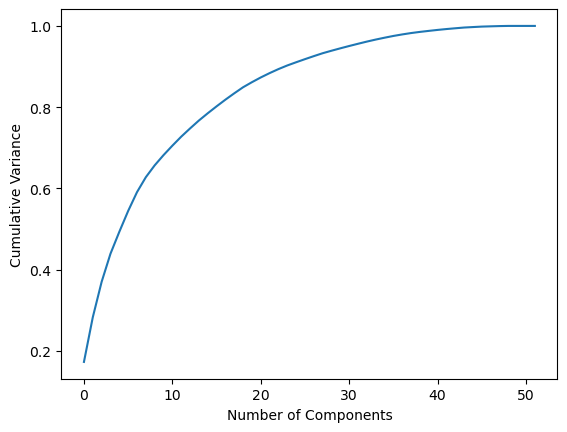

In [77]:
# plotting scree plot
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.show()

- Perform PCa with 20 components as they explain almost more than 90% variance of the data

In [78]:
#performing PCA
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components= 20)

X_train_pca = pca_final.fit_transform(X_train)

In [79]:
# Analysis on test set
X_test_pca = pca_final.transform(X_test)

### Logistic Regression with PCA

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [81]:
# Tuning hyperparameter C

#C is the the inverse of regularization strength in Logistic Regression Higher values of C correspond to less regularization.

# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [82]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

In [83]:
# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [84]:
# result of the grid search CV
cv_result = pd.DataFrame(model_cv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.151241,0.017581,0.006476,0.007938,0.01,{'C': 0.01},0.843902,0.831463,0.836201,0.845373,0.834065,0.838201,0.005485,6,0.836305,0.838952,0.838391,0.838403,0.839438,0.838298,0.001069
1,0.194142,0.014394,0.011728,0.002708,0.1,{'C': 0.1},0.845761,0.831463,0.837348,0.846757,0.834990,0.839264,0.006019,5,0.837110,0.840048,0.839776,0.839325,0.840302,0.839312,0.001148
2,0.215380,0.022449,0.012197,0.002853,1,{'C': 1},0.845761,0.831692,0.837348,0.846757,0.834990,0.839310,0.005960,1,0.837225,0.840164,0.839834,0.839613,0.840475,0.839462,0.001156
3,0.240317,0.057032,0.012779,0.007200,10,{'C': 10},0.845761,0.831692,0.837348,0.846757,0.834990,0.839310,0.005960,1,0.837398,0.840164,0.839834,0.839613,0.840475,0.839497,0.001089
4,0.242719,0.064353,0.011916,0.004356,100,{'C': 100},0.845761,0.831692,0.837348,0.846757,0.834990,0.839310,0.005960,1,0.837398,0.840164,0.839834,0.839613,0.840475,0.839497,0.001089
5,0.230108,0.081116,0.009767,0.002692,1000,{'C': 1000},0.845761,0.831692,0.837348,0.846757,0.834990,0.839310,0.005960,1,0.837398,0.840164,0.839834,0.839613,0.840475,0.839497,0.001089


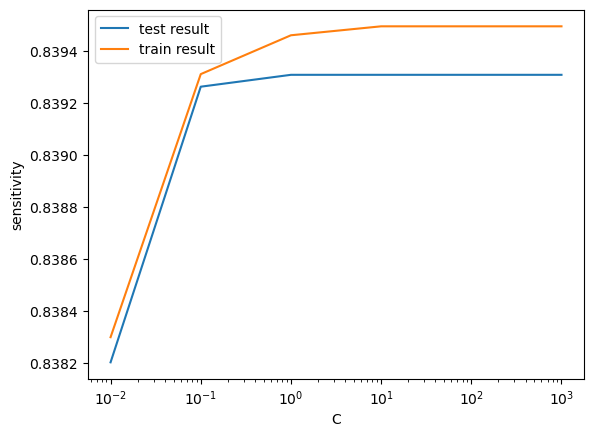

In [85]:
# plot C versus train and validation scores
plt.plot(cv_result['param_C'], cv_result['mean_test_score'])
plt.plot(cv_result['param_C'], cv_result['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [86]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8393096078441065 at C = 1


In [87]:
# LR with optimal C
logistic_pca = LogisticRegression(C = best_C)

log_pca_model = logistic_pca.fit(X_train_pca ,y_train)

### Prediction on Train set

In [88]:
y_train_pred = log_pca_model.predict(X_train_pca)

In [89]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train,y_train_pred)
print(confusion)

[[17539  4152]
 [ 3478 18213]]


In [90]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [91]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

Accuracy:- 0.8241206030150754


In [92]:
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

Sensitivity:- 0.8396570005993269


In [93]:
# Specificity
print("Specificity:-", TN / float(TN+FP))

Specificity:- 0.8085842054308239


### Prediction on Test set

In [94]:
y_test_pred = log_pca_model.predict(X_test_pca)

In [95]:
#confusion matrix
confusion =  metrics.confusion_matrix(y_test,y_test_pred)
print(confusion)

[[4406 1025]
 [ 119  427]]


In [96]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.808599631922369
Sensitivity:- 0.782051282051282
Specificity:- 0.8112686429755109


Train set :
- Accuracy = 0.8241
- Sensitivity = 0.8396 
- Specificity = 0.8085  

Test set :
- Accuracy = 0.8085
- Sensitivity =  0.7820
- Specificity =  0.8112

### Logistic Regression without PCA

In [98]:
import statsmodels.api as sm
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)),family= sm.families.Binomial())
log_no_pca = log_no_pca.fit().summary()

In [99]:
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 churnn   No. Observations:                43382
Model:                            GLM   Df Residuals:                    43332
Model Family:                Binomial   Df Model:                           49
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15749.
Date:                Mon, 11 Sep 2023   Deviance:                       31498.
Time:                        16:01:54   Pearson chi2:                 1.39e+10
No. Iterations:                   100   Pseudo R-squ. (CS):             0.4833
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6142      0.044     13.843      0.000       0.527       0.701
loc_og_t2o_mou       -4.825e-16   5.33e-17     -9.052      0.000   -5.87e-16   -3.78e-16
std_og_t2o_mou        2.677e-16   1.12e-16      2.398      0.016    4.89e-17    4.87e-16
loc_ic_t2o_mou        3.072e-17   1.13e-16      0.272      0.786   -1.91e-16    2.52e-16
arpu_6                   0.3262      0.066      4.915      0.000       0.196       0.456
arpu_7                   0.3125      0.067      4.630      0.000       0.180       0.445
arpu_8                   0.3784      0.087      4.365      0.000       0.208       0.548
total_og_mou_6           0.1673      0.034      4.930      0.000       0.101       0.234
total_og_mou_7           0.2358      0.036      6.524      0.000       0.165       0.307
total_og_mou_8          -0.8893      0.039    -22.934      0.000      -0.965      -0.813
total_ic_mou_6           0.5089      0.039     12.912      0.000       0.432       0.586
total_ic_mou_7           0.3124      0.047      6.642      0.000       0.220       0.405
total_ic_mou_8          -2.3488      0.056    -41.862      0.000      -2.459      -2.239
total_rech_num_6         0.2427      0.030      8.124      0.000       0.184       0.301
total_rech_num_7         0.0826      0.033      2.488      0.013       0.018       0.148
total_rech_num_8        -0.7628      0.036    -21.192      0.000      -0.833      -0.692
total_rech_amt_6         0.2183      0.070      3.116      0.002       0.081       0.356
total_rech_amt_7        -0.3146      0.071     -4.409      0.000      -0.454      -0.175
total_rech_amt_8        -0.4261      0.095     -4.493      0.000      -0.612      -0.240
max_rech_amt_6          -0.0286      0.031     -0.932      0.351      -0.089       0.032
max_rech_amt_7           0.0444      0.030      1.461      0.144      -0.015       0.104
max_rech_amt_8           0.0532      0.034      1.551      0.121      -0.014       0.120
last_day_rch_amt_6      -0.0084      0.024     -0.349      0.727      -0.055       0.039
last_day_rch_amt_7      -0.0739      0.022     -3.289      0.001      -0.118      -0.030
last_day_rch_amt_8      -0.5218      0.028    -18.782      0.000      -0.576      -0.467
vol_2g_mb_6              0.1558      0.025      6.256      0.000       0.107       0.205
vol_2g_mb_7              0.2193      0.027      8.089      0.000       0.166       0.272
vol_2g_mb_8             -0.1665      0.033     -5.120      0.000      -0.230      -0.103
vol_3g_mb_6              0.2657      0.041      6.448      0.000       0.185       0.346
vol_3g_mb_7              0.3252      0.044      7.406      0.000       0.239       0.411
vol_3g_mb_8             -0.2128      0.046     -4.674      0.000      -0.302      -0.124
monthly_2g_6            -0.3536      0.028    -12.678    

### Feature Selection By RFE

In [100]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [101]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train,y_train)

In [102]:
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'sep_vbc_3g', 'decr_mou_action', 'decr_rech_num_action',
       'decr_arpu_action'],
      dtype='object')


#### Model 1

In [103]:
X_train_sm1 = sm.add_constant(X_train[rfe_cols])

log_no_pca1 = sm.GLM(y_train,X_train_sm1 ,family= sm.families.Binomial())

log_no_pca1 = log_no_pca1.fit()
log_no_pca1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 churnn   No. Observations:                43382
Model:                            GLM   Df Residuals:                    43366
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16481.
Date:                Mon, 11 Sep 2023   Deviance:                       32962.
Time:                        16:02:12   Pearson chi2:                 6.84e+12
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4655
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6494      0.037     17.496      0.000       0.577       0.722
arpu_6                   0.5574      0.024     23.404      0.000       0.511       0.604
total_og_mou_7           0.4452      0.025     17.782      0.000       0.396       0.494
total_og_mou_8          -0.9602      0.032    -29.891      0.000      -1.023      -0.897
total_ic_mou_6           0.6259      0.032     19.809      0.000       0.564       0.688
total_ic_mou_8          -2.3107      0.047    -49.423      0.000      -2.402      -2.219
total_rech_num_6         0.3969      0.024     16.364      0.000       0.349       0.444
total_rech_num_8        -0.7650      0.028    -27.550      0.000      -0.819      -0.711
last_day_rch_amt_8      -0.5739      0.024    -24.050      0.000      -0.621      -0.527
monthly_2g_8            -0.8180      0.036    -22.737      0.000      -0.889      -0.747
sachet_2g_8             -0.4562      0.024    -19.029      0.000      -0.503      -0.409
monthly_3g_8            -0.7360      0.032    -22.947      0.000      -0.799      -0.673
sep_vbc_3g              -0.7992      0.077    -10.360      0.000      -0.950      -0.648
decr_mou_action         -0.4554      0.039    -11.746      0.000      -0.531      -0.379
decr_rech_num_action    -0.8085      0.039    -20.591      0.000      -0.885      -0.732
decr_arpu_action        -0.5149      0.042    -12.140      0.000      -0.598      -0.432
========================================================================================
"""

In [104]:
# checking VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [105]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values,i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' ,ascending= False)
vif

,Features,VIF
14,decr_arpu_action,5.31
12,decr_mou_action,4.29
13,decr_rech_num_action,4.12
2,total_og_mou_8,2.61
6,total_rech_num_8,2.06
4,total_ic_mou_8,1.99
1,total_og_mou_7,1.91
3,total_ic_mou_6,1.73
5,total_rech_num_6,1.59
0,arpu_6,1.33


- Column 'decr_arpu_action' has a higher Vif so drop that column

In [106]:
rfe_cols = rfe_cols.drop('decr_arpu_action')
print(rfe_cols)

Index(['arpu_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'sep_vbc_3g', 'decr_mou_action', 'decr_rech_num_action'],
      dtype='object')


#### Model 2

In [107]:
X_train_sm2 = sm.add_constant(X_train[rfe_cols])

log_no_pca2 = sm.GLM(y_train,X_train_sm2 ,family= sm.families.Binomial())

log_no_pca2 = log_no_pca2.fit()
log_no_pca2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 churnn   No. Observations:                43382
Model:                            GLM   Df Residuals:                    43367
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16555.
Date:                Mon, 11 Sep 2023   Deviance:                       33111.
Time:                        16:02:15   Pearson chi2:                 1.36e+11
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4637
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5199      0.035     14.727      0.000       0.451       0.589
arpu_6                   0.4955      0.023     21.658      0.000       0.451       0.540
total_og_mou_7           0.4674      0.025     18.804      0.000       0.419       0.516
total_og_mou_8          -0.9379      0.032    -29.388      0.000      -1.000      -0.875
total_ic_mou_6           0.6464      0.032     20.508      0.000       0.585       0.708
total_ic_mou_8          -2.3061      0.047    -49.451      0.000      -2.397      -2.215
total_rech_num_6         0.3844      0.024     16.044      0.000       0.337       0.431
total_rech_num_8        -0.7391      0.027    -26.902      0.000      -0.793      -0.685
last_day_rch_amt_8      -0.5346      0.023    -22.964      0.000      -0.580      -0.489
monthly_2g_8            -0.8121      0.036    -22.578      0.000      -0.883      -0.742
sachet_2g_8             -0.4593      0.024    -19.209      0.000      -0.506      -0.412
monthly_3g_8            -0.7103      0.032    -22.303      0.000      -0.773      -0.648
sep_vbc_3g              -0.7619      0.076    -10.034      0.000      -0.911      -0.613
decr_mou_action         -0.6419      0.036    -17.932      0.000      -0.712      -0.572
decr_rech_num_action    -0.9424      0.038    -24.924      0.000      -1.017      -0.868
========================================================================================
"""

In [108]:
# check VIF

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values,i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' ,ascending= False)
vif

,Features,VIF
13,decr_rech_num_action,3.04
12,decr_mou_action,3.03
2,total_og_mou_8,2.61
6,total_rech_num_8,2.06
4,total_ic_mou_8,1.99
1,total_og_mou_7,1.91
3,total_ic_mou_6,1.72
5,total_rech_num_6,1.58
0,arpu_6,1.31
7,last_day_rch_amt_8,1.20


- VIF values for the model 2 has significant VIF values 
- Hence Model 2 will be the final model

### Model performance on train set

In [109]:
#predicting on train set
y_train_pred_nopca = log_no_pca2.predict(X_train_sm2)
y_train_pred_nopca.head()

0    0.791710
1    0.819696
2    0.817830
3    0.003349
4    0.005298
dtype: float64

In [110]:
#predicting the actual churn and the predicted probabilities
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_nopca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()


,churn,churn_prob,CustID
0,0,0.791710,0
1,0,0.819696,1
2,0,0.817830,2
3,0,0.003349,3
4,0,0.005298,4


In [111]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.791710,0,1,1,1,1,1,1,1,1,0,0
1,0,0.819696,1,1,1,1,1,1,1,1,1,1,0
2,0,0.817830,2,1,1,1,1,1,1,1,1,1,0
3,0,0.003349,3,1,0,0,0,0,0,0,0,0,0
4,0,0.005298,4,1,0,0,0,0,0,0,0,0,0


In [112]:
# Calculate Accuracy ,Sensitivity amd specificity
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
    

     probability  accuracy  sensitivity  specificity
0.0  0.0          0.500000  1.000000     0.000000   
0.1  0.1          0.709718  0.972247     0.447190   
0.2  0.2          0.766562  0.952377     0.580748   
0.3  0.3          0.806925  0.931170     0.682679   
0.4  0.4          0.836361  0.908810     0.763911   
0.5  0.5          0.854686  0.880365     0.829007   
0.6  0.6          0.857775  0.835462     0.880089   
0.7  0.7          0.844613  0.768936     0.920290   
0.8  0.8          0.778157  0.603107     0.953206   
0.9  0.9          0.630538  0.279056     0.982020   


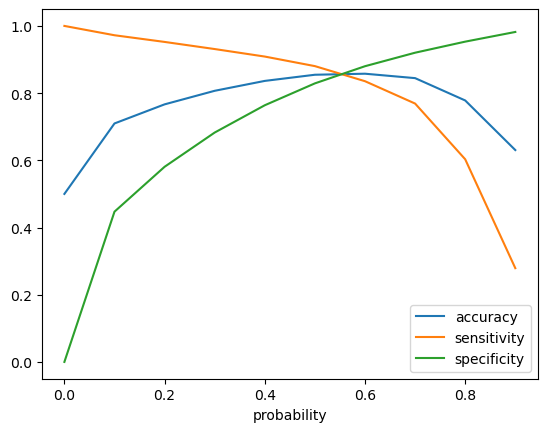

In [113]:
#plotting  Accuracy ,Sensitivity amd specificity
cutoff_df.plot('probability',['accuracy','sensitivity','specificity'])
plt.show()

1. Accuracy has been stable near around 0.6
2. Sensitivity decreases with increase in probability
3. Specificity increases with increase in probability    

In [114]:
# creating predicted column
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.791710,0,1,1,1,1,1,1,1,1,0,0,1
1,0,0.819696,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.817830,2,1,1,1,1,1,1,1,1,1,0,1
3,0,0.003349,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.005298,4,1,0,0,0,0,0,0,0,0,0,0


In [115]:
# confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final['churn'],y_train_pred_final['predicted'])
print(confusion)

[[17982  3709]
 [ 2595 19096]]


In [116]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [117]:
# Calulate Accuracy
print('Accuracy =',metrics.accuracy_score(y_train_pred_final['churn'],y_train_pred_final['predicted']))

Accuracy = 0.8546862754137661


In [118]:
# Calulate Sensitivity
print('Sensitivity =',TP /float(TP+FN))

Sensitivity = 0.880365128394265


In [119]:
# Calulate Specificity
print('Specificity =',TN /float(TN+FP))

Specificity = 0.8290074224332673


In [120]:
# Plotting ROC Curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

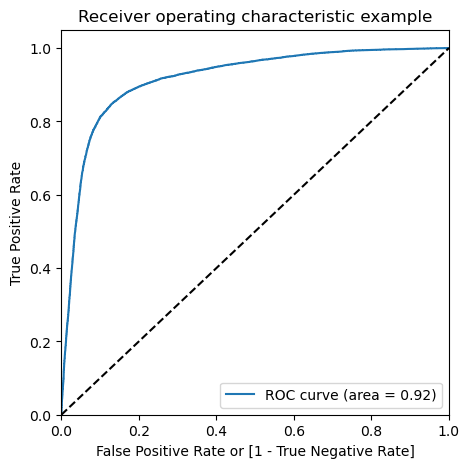

In [121]:
draw_roc(y_train_pred_final['churn'],y_train_pred_final['churn_prob'])

### Predicting on Test set

In [122]:
num_cols = X_test.select_dtypes(include=['float64','int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,decr_mou_action,decr_rech_num_action,decr_rech_amt_action,decr_arpu_action,decr_vbc_action
25590,0.0,0.0,0.0,-0.090556,-1.260577,-1.264276,-0.310899,-0.954799,-0.918016,0.761057,-0.452409,-0.534433,0.143203,-0.881230,-1.080036,-0.125790,-1.229137,-1.168556,-0.303776,-0.672502,-0.979181,-0.395255,-0.792349,-0.662226,1.475470,0.082714,-0.271501,-0.256875,-0.307638,-0.277707,-0.337158,-0.323698,-0.314616,2.054786,0.226301,-0.319708,-0.305594,-0.289182,-0.277540,-0.158995,-0.161666,-0.157623,-0.979657,-0.326599,-0.332467,-0.312012,-0.11543,1,1,1,1,0
8285,0.0,0.0,0.0,0.257004,0.403677,0.735382,0.592692,0.400191,0.338498,1.459204,0.940232,0.681043,-0.257183,0.553950,1.272000,0.002415,0.348387,0.658027,-0.303776,-0.270440,-0.162878,-0.538902,0.084509,0.270186,-0.279119,-0.275929,-0.271501,-0.256875,-0.307638,-0.277707,-0.337158,-0.323698,-0.314616,-0.310444,-0.309807,-0.319708,-0.305594,-0.289182,-0.277540,-0.158995,-0.161666,-0.157623,0.740318,-0.326599,-0.332467,-0.312012,-0.11543,1,0,0,0,0
18450,0.0,0.0,0.0,-1.476719,0.447526,1.848882,-1.096116,-0.531063,-0.597671,-0.871881,-0.180536,-0.329999,-0.957860,-0.061127,0.737446,-1.343735,0.766274,2.190000,-0.478610,-0.213002,-0.162878,-0.754374,0.243938,0.270186,-0.279119,-0.275929,-0.271501,-0.256875,-0.307638,-0.277707,-0.337158,-0.323698,-0.314616,-0.310444,-0.309807,-0.319708,-0.305594,-0.289182,-0.277540,-0.158995,-0.161666,-0.157623,0.978198,-0.326599,-0.332467,-0.312012,-0.11543,0,0,0,0,0
54519,0.0,0.0,0.0,-0.629706,-0.600708,-0.775900,-0.616355,-0.581759,-0.666619,-0.412273,0.237105,-0.393740,0.043107,0.143899,-0.331661,-0.659976,-0.591859,-0.716820,-0.711721,-0.672502,-0.665218,-0.538902,-0.393777,-0.447054,-0.279119,-0.275929,-0.271501,-0.256875,-0.307638,-0.277707,-0.337158,-0.323698,-0.314616,-0.310444,-0.309807,-0.319708,-0.305594,-0.289182,-0.277540,-0.158995,-0.161666,-0.157623,0.011165,-0.326599,-0.332467,-0.312012,-0.11543,0,1,1,1,0
48456,0.0,0.0,0.0,-0.097943,-0.341056,-0.219189,-0.990546,-1.016593,-0.911625,-0.637130,-0.795414,-0.734675,-0.857764,-0.778717,-0.759304,-0.266815,-0.332769,-0.178666,0.465492,0.487736,0.603191,1.055587,1.216452,1.145218,-0.182160,-0.059848,0.375657,0.973279,2.210697,0.927201,-0.337158,-0.323698,-0.314616,-0.310444,-0.309807,-0.319708,3.282887,3.067015,3.282242,-0.158995,-0.161666,-0.157623,-0.161557,2.884240,3.709596,2.793275,-0.11543,1,1,1,1,0


In [123]:
X_test_sm = sm.add_constant(X_test)

In [124]:
X_test_sm

,const,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,decr_mou_action,decr_rech_num_action,decr_rech_amt_action,decr_arpu_action,decr_vbc_action
25590,1.0,0.0,0.0,0.0,-0.090556,-1.260577,-1.264276,-0.310899,-0.954799,-0.918016,0.761057,-0.452409,-0.534433,0.143203,-0.881230,-1.080036,-0.125790,-1.229137,-1.168556,-0.303776,-0.672502,-0.979181,-0.395255,-0.792349,-0.662226,1.475470,0.082714,-0.271501,-0.256875,-0.307638,-0.277707,-0.337158,-0.323698,-0.314616,2.054786,0.226301,-0.319708,-0.305594,-0.289182,-0.277540,-0.158995,-0.161666,-0.157623,-0.979657,-0.326599,-0.332467,-0.312012,-0.11543,1,1,1,1,0
8285,1.0,0.0,0.0,0.0,0.257004,0.403677,0.735382,0.592692,0.400191,0.338498,1.459204,0.940232,0.681043,-0.257183,0.553950,1.272000,0.002415,0.348387,0.658027,-0.303776,-0.270440,-0.162878,-0.538902,0.084509,0.270186,-0.279119,-0.275929,-0.271501,-0.256875,-0.307638,-0.277707,-0.337158,-0.323698,-0.314616,-0.310444,-0.309807,-0.319708,-0.305594,-0.289182,-0.277540,-0.158995,-0.161666,-0.157623,0.740318,-0.326599,-0.332467,-0.312012,-0.11543,1,0,0,0,0
18450,1.0,0.0,0.0,0.0,-1.476719,0.447526,1.848882,-1.096116,-0.531063,-0.597671,-0.871881,-0.180536,-0.329999,-0.957860,-0.061127,0.737446,-1.343735,0.766274,2.190000,-0.478610,-0.213002,-0.162878,-0.754374,0.243938,0.270186,-0.279119,-0.275929,-0.271501,-0.256875,-0.307638,-0.277707,-0.337158,-0.323698,-0.314616,-0.310444,-0.309807,-0.319708,-0.305594,-0.289182,-0.277540,-0.158995,-0.161666,-0.157623,0.978198,-0.326599,-0.332467,-0.312012,-0.11543,0,0,0,0,0
54519,1.0,0.0,0.0,0.0,-0.629706,-0.600708,-0.775900,-0.616355,-0.581759,-0.666619,-0.412273,0.237105,-0.393740,0.043107,0.143899,-0.331661,-0.659976,-0.591859,-0.716820,-0.711721,-0.672502,-0.665218,-0.538902,-0.393777,-0.447054,-0.279119,-0.275929,-0.271501,-0.256875,-0.307638,-0.277707,-0.337158,-0.323698,-0.314616,-0.310444,-0.309807,-0.319708,-0.305594,-0.289182,-0.277540,-0.158995,-0.161666,-0.157623,0.011165,-0.326599,-0.332467,-0.312012,-0.11543,0,1,1,1,0
48456,1.0,0.0,0.0,0.0,-0.097943,-0.341056,-0.219189,-0.990546,-1.016593,-0.911625,-0.637130,-0.795414,-0.734675,-0.857764,-0.778717,-0.759304,-0.266815,-0.332769,-0.178666,0.465492,0.487736,0.603191,1.055587,1.216452,1.145218,-0.182160,-0.059848,0.375657,0.973279,2.210697,0.927201,-0.337158,-0.323698,-0.314616,-0.310444,-0.309807,-0.319708,3.282887,3.067015,3.282242,-0.158995,-0.161666,-0.157623,-0.161557,2.884240,3.709596,2.793275,-0.11543,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30200,1.0,0.0,0.0,0.0,-0.653525,0.188304,0.473063,-0.074056,1.871897,1.875100,-0.746901,-0.362567,-0.242611,-0.657570,-0.163640,-0.331661,-0.687754,0.400623,0.263249,-0.362054,-0.224490,-0.074969,0.035688,0.227995,0.270186,-0.279119,-0.275929,-0.271501,-0.256875,-0.307638,-0.277707,-0.337158,-0.323698,-0.314616,-0.310444,-0.309807,0.209626,-0.305594,-0.289182,-0.277540,-0.158995,-0.161666,-0.157623,0.026678,-0.326599,-0.332467,-0.312012,-0.11543,0,0,0,0,0
13062,1.0,0.0,0.0,0.0,-0.098161,-1.099349,-1.261832,0.331960,-0.713142,-0.918016,-0.530723,-0.724687,-0.841604,0.143203,-0.061127,-0.973126,-0.134337,-1.072430,-1.168556,-0.362054,-0.787377,-0.979181,-0.538902,-0.792349,-0.662226,-0.279119,-0.275929,-0.271501,-0.256875,-0.307638,-0.277707,-0.

In [125]:
y_pred1 = pd.DataFrame(y_test_pred)
y_pred1.head()

,0
0,1
1,0
2,0
3,1
4,0


In [126]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churnn
25590,0
8285,0
18450,0
54519,0
48456,0


In [127]:
y_test_df['CustID'] = y_test_df.index

In [128]:
y_pred1.reset_index(drop=True , inplace= True)
y_test_df.reset_index(drop= True ,inplace= True)

In [129]:
y_test_pred_final = pd.concat([y_test_df,y_pred1],axis=1)

In [130]:
y_test_pred_final.head()

,churnn,CustID,0
0,0,25590,1
1,0,8285,0
2,0,18450,0
3,0,54519,1
4,0,48456,0


In [131]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})


In [132]:
y_test_pred_final

,churnn,CustID,churn_prob
0,0,25590,1
1,0,8285,0
2,0,18450,0
3,0,54519,1
4,0,48456,0
...,...,...,...
5972,0,30200,0
5973,1,13062,1
5974,0,91745,0
5975,0,62522,0


In [133]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [134]:
y_test_pred_final.head()

,churnn,CustID,churn_prob,test_predicted
0,0,25590,1,1
1,0,8285,0,0
2,0,18450,0,0
3,0,54519,1,1
4,0,48456,0,0


In [135]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churnn'], y_test_pred_final['test_predicted'])
print(confusion)

[[4406 1025]
 [ 119  427]]


In [136]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churnn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.808599631922369
Sensitivity:- 0.880365128394265
Specificity:- 0.8290074224332673


## Conclusion

Model With PCA

Train set :
- Accuracy = 0.8241
- Sensitivity = 0.8396 
- Specificity = 0.8085  

Test set :
- Accuracy = 0.8085
- Sensitivity =  0.7820
- Specificity =  0.8112

Model without PCA

Train set :
- Accuracy:- 0.8546
- Sensitivity:- 0.8803
- Specificity:- 0.8290

Test set :
- Accuracy:- 0.8085
- Sensitivity:- 0.8803
- Specificity:- 0.8290